# Prueba Técnica DS

El proposito de esta prueba técnica es comprobar si el candidato posee conocimientos de Python (básico y aplicados a ML). Desde Python 3, aconsejamos usar las siguientes librerias (salvo que se indique lo contrario): **numpy, pandas, matplotlib**



## Bloque 1: Python general

### 1.1: Escribe una función que te devuelva una matriz de números aleatorios entre 1 y 100 con 2 decimales. El número de filas y columnas de la matriz será determinado por sendos parámetros. Utiliza la función para crear una matriz de 10 filas y 7 columnas.
<font color="#9E1B32">**(No utilices NUMPY ni PANDAS en este apartado 1.1, en los demás puedes usarlo)**</font>


In [1]:
import random
def matriz_aleatoria(filas: int, columnas: int) -> list:
    """Crea una matriz a partir de una lista
    ----------
    Parametros:
    filas: int
        numero de filas de la matriz
    columnas: int
        numero de columnas de la matriz
    """
    matriz = []
    for i in range(filas):
        fila = []
        for j in range(columnas):
            fila.append(round(random.uniform(1, 100), 2))
        matriz.append(fila)
    return matriz

matriz_test = matriz_aleatoria(10,7)
matriz_test

[[84.08, 76.64, 91.68, 45.47, 46.22, 41.0, 51.46],
 [79.79, 90.69, 9.28, 85.25, 84.52, 12.42, 23.17],
 [70.88, 55.6, 63.22, 96.32, 38.84, 83.66, 98.14],
 [82.86, 84.0, 35.12, 28.08, 49.43, 30.87, 78.15],
 [38.91, 20.28, 40.94, 34.56, 38.39, 85.95, 84.92],
 [18.98, 69.65, 97.69, 51.09, 79.26, 46.33, 83.38],
 [10.03, 1.17, 39.98, 89.66, 27.2, 1.76, 33.92],
 [92.46, 99.49, 18.15, 2.4, 71.16, 33.82, 27.5],
 [74.52, 6.43, 20.25, 71.85, 8.51, 61.35, 15.99],
 [32.67, 51.97, 60.31, 73.02, 4.94, 62.2, 97.05]]

### 1.2: Normaliza los elementos de la matriz anterior, de modo que todos los valores se encuentren entre 0 y 1


In [2]:
def normalizador(matriz):
    """Normaliza los valores de una matriz
    ----------
    Parametros:
    matriz: list
        matriz a normalizar
    """
    matriz_normalizada = []
    for fila in matriz:
        fila_normalizada = [round(elemento/100,2) for elemento in fila]
        matriz_normalizada.append(fila_normalizada)
    return matriz_normalizada

matriz_test_norm = normalizador(matriz_test)
matriz_test_norm

[[0.84, 0.77, 0.92, 0.45, 0.46, 0.41, 0.51],
 [0.8, 0.91, 0.09, 0.85, 0.85, 0.12, 0.23],
 [0.71, 0.56, 0.63, 0.96, 0.39, 0.84, 0.98],
 [0.83, 0.84, 0.35, 0.28, 0.49, 0.31, 0.78],
 [0.39, 0.2, 0.41, 0.35, 0.38, 0.86, 0.85],
 [0.19, 0.7, 0.98, 0.51, 0.79, 0.46, 0.83],
 [0.1, 0.01, 0.4, 0.9, 0.27, 0.02, 0.34],
 [0.92, 0.99, 0.18, 0.02, 0.71, 0.34, 0.28],
 [0.75, 0.06, 0.2, 0.72, 0.09, 0.61, 0.16],
 [0.33, 0.52, 0.6, 0.73, 0.05, 0.62, 0.97]]

### 1.3: A partir de la matriz normalizada, filtra todos aquellos valores comprendidos entre 0.10 y 0.90
El resultado debe ser un vector con dichos valores ordenados descendentemente

In [3]:
import pandas as pd
def filtro(matriz):
    """Filtra los valores de una matriz
    ----------
    Parametros:
    matriz: list
        matriz a filtrar
    """
    matriz_filtrada = []
    for fila in matriz:
        for elemento in fila:
            if elemento > 0.1 and elemento < 0.9:
                matriz_filtrada.append(elemento)
    return(sorted(matriz_filtrada, reverse=True))

filtro(matriz_test_norm)

[0.86,
 0.85,
 0.85,
 0.85,
 0.84,
 0.84,
 0.84,
 0.83,
 0.83,
 0.8,
 0.79,
 0.78,
 0.77,
 0.75,
 0.73,
 0.72,
 0.71,
 0.71,
 0.7,
 0.63,
 0.62,
 0.61,
 0.6,
 0.56,
 0.52,
 0.51,
 0.51,
 0.49,
 0.46,
 0.46,
 0.45,
 0.41,
 0.41,
 0.4,
 0.39,
 0.39,
 0.38,
 0.35,
 0.35,
 0.34,
 0.34,
 0.33,
 0.31,
 0.28,
 0.28,
 0.27,
 0.23,
 0.2,
 0.2,
 0.19,
 0.18,
 0.16,
 0.12]

## Bloque 2: Exploración de Datos

Se dispone de un conjunto de datos que contiene observaciones de vuelos nacionales estadounidenses en 2023, almacenado en el fichero vuelos.csv,  que consta de los siguientes campos:

* Fecha: La fecha del vuelo, en formato YYYY-MM-DD
* Compañía: La abreviatura de dos letras de la compañía aérea.
* AeropuertoOrigenID: Identificador numérico único del aeropuerto de salida.
* AeropuertoOrigen: El nombre completo del aeropuerto de salida
* AeropuertoDestinoID: Identificador numérico único del aeropuerto de destino
* AeropuertoDestino: El nombre completo del aeropuerto de destino
* HoraSalidaProgramada: La hora de salida programada
* RetrasoSalida: El número de minutos que se retrasó la salida (los vuelos que salieron antes de lo previsto tienen un valor negativo)
* SalidaTarde: Un indicador binario de que la salida se retrasó más de 15 minutos (y por lo tanto se considera "tarde"). Si se retrasa menos, se considera "puntual".
* HoraLlegadaProgramada: La hora de llegada programada
* RetrasoLlegada: El número de minutos que se retrasó la llegada (el vuelo que llegó antes de lo previsto tiene un valor negativo)
* LlegadaTarde: Un indicador binario de que la llegada se retrasó más de 15 minutos (y por lo tanto se considera "tarde"). Si se retrasa menos, se considera "puntual".
* Cancelado: Un indicador binario que indica si l vuelo fue cancelado

## El reto consiste en explorar los datos de los vuelos para analizar los posibles factores que afectan a los retrasos en la salida o llegada.

### 2.1 Empezaremos por limpiar los datos.
* Identifica cualquier dato nulo o faltante, y tratalo convenientemente.
* Identifica y elimina cualquier valor atípico (outliers) en las columnas que determinan los retrasos de llegada y salida.
### 2.2 Utilice estadísticas, funciones de agregación y visualizaciones para responder a las siguientes preguntas:
* ¿Cuáles son los retrasos medios de salida y llegada?
* ¿Cómo se comportan las compañías aéreas en cuanto a los retrasos de llegada y salida medios se refiere?
* ¿Qué aeropuerto tiene el mayor número de retrasos de salida?

<font color="#9E1B32">**(Justifica y explica todas tus respuestas y acciones, con comentarios apropiados.)**</font>



## 2.1 ##

In [6]:
import pandas as pd
from pandas.core.interchange.dataframe_protocol import DataFrame

# Cambiar por path propio
df = pd.read_csv("/content/vuelos.csv")

pd.set_option('display.max_columns', None)
print(df.info())
print("HEAD:\n",df.head())
print("Valores unicos por columna:\n",df.nunique())

na_percentage = df.isna().mean()*100
print("% NA totales",round(na_percentage,2))

df_numericas = df.select_dtypes(include=['float64', 'int64'])

means = df_numericas.drop(columns=["AeropuertoOrigenID", "AeropuertoDestinoID"]).mean()
print("Valores medios:\n",round(means,2))

value_counts_numeric_columns = df_numericas.apply(lambda x: x.value_counts())
total_count = len(df)
minority_class_percentage = (value_counts_numeric_columns.min() / total_count) * 100
print("Proporcion de la clase minoritaria:\n",round(minority_class_percentage,2))

print("Comparacion de valores medios y proporcion de la clase minoritaria después de borrar NAs")
print("Diferencia valores medios con NAs vs sin NAs:\n",round(df_numericas.drop(columns=["AeropuertoOrigenID", "AeropuertoDestinoID"]).dropna().mean(),2) - round(df_numericas.mean(),2))
print("Diferencia proporcion de la clase minoritaria con NAs vs sin NAs:\n",round((df_numericas.dropna().apply(lambda x: x.value_counts()).min() / len(df_numericas.dropna())) * 100,2) - round(minority_class_percentage,2))
print(df[(df["Cancelado"]==1) & ((df["SalidaTarde"]==0) | (df["SalidaTarde"]==1))].shape)

print("Hay 2761 vuelos cancelados con SalidaTarde NA. Si hacemos un dropna, nos quedan tan solo 155 filas de cancelados, \n entonces considero mejor asignarle otro valor para el análisis = 2. Con esto no perdemos información ni generamos más \n desbalanceo en esta variable (Cancelados ya es 1% clase 1's, pasaría a 0.05%) y podemos seguir con el análisis.")
df_sin_na = df.fillna(2)
na_total = df_sin_na.isna().sum()
print("% NA totales",round(na_total,2))

def sin_atipicos(df: DataFrame, columna: str) -> DataFrame:
    """
    Eliminar atipicos de una columna del Dataframe
    Parametros
    ----------
    df:
        Dataframe de entrada
    columna:
        string con el nombre de la columna a filtrar

    Devuelve
    -------
    df_filtrado
        DataFrame sin atipicos
    """
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inf = Q1 - 1.5 * IQR
    limite_sup = Q3 + 1.5 * IQR
    df_filtrado = df[(df[columna] >= limite_inf) & (df[columna] <= limite_sup)]
    return df_filtrado

df_limpio_llegada = sin_atipicos(df_sin_na, "RetrasoLlegada")
print(df_limpio_llegada.info())

df_limpio_lleg_sal = sin_atipicos(df_limpio_llegada, "RetrasoSalida")
print(df_limpio_lleg_sal.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271940 entries, 0 to 271939
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Fecha                  271940 non-null  object 
 1   Compañía               271940 non-null  object 
 2   AeropuertoOrigenID     271940 non-null  int64  
 3   AeropuertoOrigen       271940 non-null  object 
 4   AeropuertoDestinoID    271940 non-null  int64  
 5   AeropuertoDestino      271940 non-null  object 
 6   HoraSalidaProgramada   271940 non-null  int64  
 7   RetrasoSalida          271940 non-null  int64  
 8   SalidaTarde            269179 non-null  float64
 9   HoraLlegadaProgramada  271940 non-null  int64  
 10  RetrasoLlegada         271940 non-null  int64  
 11  LlegadaTarde           271940 non-null  int64  
 12  Cancelado              271940 non-null  int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 27.0+ MB
None
HEAD:
         Fecha Compa

## 2.2 ##

In [7]:
# ¿Cuáles son los retrasos medios de salida y llegada?
df_numericas = df_limpio_lleg_sal.select_dtypes(include=['float64', 'int64'])
means = df_numericas.drop(columns=["AeropuertoOrigenID", "AeropuertoDestinoID"]).mean()
print("Valores medios de retrasos:\n",round(means[["RetrasoSalida","RetrasoLlegada"]],2))

#¿Cómo se comportan las compañías aéreas en cuanto a los retrasos de llegada y salida medios se refiere?
retrasos_medios_por_compania = df_limpio_lleg_sal.groupby("Compañía")[["RetrasoSalida", "RetrasoLlegada"]].mean()
print("Retrasos medios por compañía",retrasos_medios_por_compania)

# ¿Qué aeropuerto tiene el mayor número de retrasos de salida?
retrasos_por_aeropuerto = df_limpio_lleg_sal[df_limpio_lleg_sal["RetrasoSalida"] > 0].groupby("AeropuertoOrigen")["RetrasoSalida"].count()
aeropuerto_con_mas_retrasos = retrasos_por_aeropuerto.idxmax()
numero_de_retrasos = retrasos_por_aeropuerto.max()

print(f"El aeropuerto con mayor número de retrasos de salida es: {aeropuerto_con_mas_retrasos} con {numero_de_retrasos} vuelos retrasados.")

Valores medios de retrasos:
 RetrasoSalida    -0.55
RetrasoLlegada   -4.86
dtype: float64
Retrasos medios por compañía           RetrasoSalida  RetrasoLlegada
Compañía                               
9E            -2.691837       -7.577078
AA            -0.460496       -5.857692
AS            -3.499522       -4.302611
B6            -2.156412       -5.921184
DL            -1.217042       -6.443503
EV            -2.144199       -6.785970
F9            -0.151877       -0.136519
FL             0.097396       -3.528849
HA            -3.038997       -2.601671
MQ            -1.408908       -3.995188
OO            -2.355856       -4.120307
UA            -0.019288       -7.923060
US            -2.207311       -3.850521
VX            -0.682682       -5.507086
WN             2.699462       -2.124086
YV            -2.415935       -3.773126
El aeropuerto con mayor número de retrasos de salida es: Hartsfield-Jackson Atlanta International con 4009 vuelos retrasados.


Opcional Graficar tabla retrasos_medios_por_compania

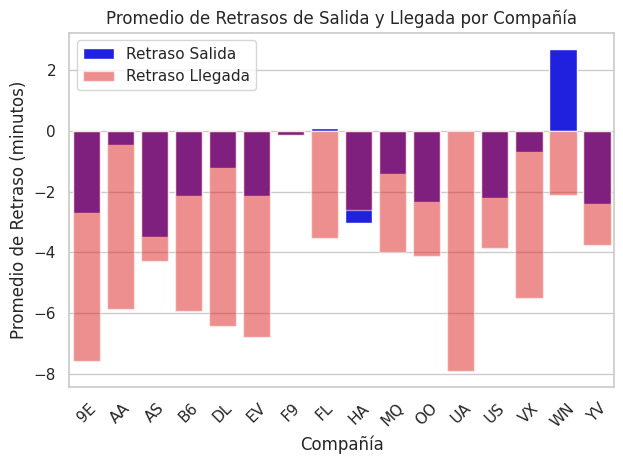

In [8]:
# Grafico
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

ax1 = sns.barplot(x=retrasos_medios_por_compania.index, y="RetrasoSalida", data=retrasos_medios_por_compania, color='blue', label='Retraso Salida')
ax2 = sns.barplot(x=retrasos_medios_por_compania.index, y="RetrasoLlegada", data=retrasos_medios_por_compania, color='red', alpha=0.5, label='Retraso Llegada')

plt.xlabel('Compañía')
plt.ylabel('Promedio de Retraso (minutos)')
plt.title('Promedio de Retrasos de Salida y Llegada por Compañía')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()